
# The Leaky Integrate-and-Fire Neuron
Central to this course is the Leaky Integrate-and-Fire (LIF) neuron, a strongly simplified but frequently used neuron model.
The basic idea of LIF neuron was proposed in 1907 by Louis Édouard Lapicque, long before we understood the electrophysiology of a neuron [see a translation of Lapicque's paper [link text](https://pubmed.ncbi.nlm.nih.gov/17968583/)].
Real neurons have elaborate anatomical structures which give rise to complex membrane potential dynamics.
The LIF neuron omits all this structure and describes the membrane potential by a single value, hence it is considered to be a ''point-neuron''.

More about the LIF neuron model can be found in the book Theoretical Neuroscience {cite}`dayan2001theoretical`, section 5.4: ''Integrate-and-Fire Models''.

In the following, we will characterize the neuron's response based on different inputs.


In [1]:
from nb_helpers import glue_yt
glue_yt('vid_intro', 'Fi4JRo4TB6I')

/opt/conda/lib/python3.9/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


{glue:}`vid_intro`
YouTube: Computational Modeling of Neuronal Plasticity: Introduction https://youtu.be/Fi4JRo4TB6I

## A neuron with step current input
We start with the simplest version of the LIF neuron, which receives a constant current input.
Constant current inputs were used in classical electrophysiology experiments to describe basic properties of the neuronal membrane.
The subthreshold membrane potential dynamics of a LIF neuron are described by

$$
\tau_{\mathrm{mem}} \frac{dV}{dt} = E_\mathrm{leak} - V + R_ \mathrm{m} I_ \mathrm{ext} . 
$$ (lif_basic_eq)

Equation {eq}`lif_basic_eq` is an ordinary differential equation and describes the membrane voltage V, commonly stated in millivolts (mV).
$\tau_\mathrm{mem}$ refers to the membrane time constant, $E_\mathrm{leak}$ is the reversal potential for the leak, 
$R_ \mathrm{m}$ is the membrane resistance, and $I_ \mathrm{ext}$ describes an external current applied to the neuron.
To make such LIF neuron spike, the membrane potential is reset to $V_\mathrm{reset}$ whenever the membrane voltage hits a predefined spiking threshold $V_\mathrm{thresh}$.

Your first task is to write a simple Python program that simulates a single LIF neuron for 200 ms.
Use Euler integration to solve the equation.
It is helpful to make a separate Python file in which the the neuron and the Euler integration is defined.
At first, use an Euler integration time step of 0.1 ms.
This integration time step will be looked at in more detail in a following section.
Plot the membrane voltage over time.
Show the spike times as vertical lines in the same plot.
What is the spiking behaviour of the neuron?
What happens if the external current is increased to 4.0 nA?

Please use the following neuron parameters
$\tau_\mathrm{mem} = 20 ms$, $E_\mathrm{leak} = -60 mV$, $R_ \mathrm{m} = 10 M\Omega$, $I_ \mathrm{ext} = 2.0 nA$, $V_\mathrm{reset}= -70 mV$, $V_\mathrm{thresh} = -50 mV$


In [11]:
from IPython.display import HTML

HTML('<iframe width="950" height="540" src="https://www.youtube.com/embed/yqBpgx8scWI?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


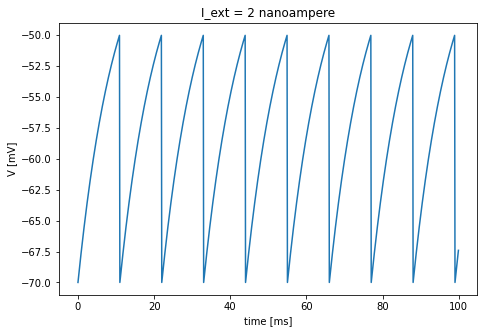

In [9]:
# %matplotlib agg
import warnings
warnings.filterwarnings("ignore")

from myst_nb import glue
import lif_neuron_sec1 as lif
import numpy as np
import matplotlib.pyplot as plt
import pint
si = pint.UnitRegistry()

V_0 = -70*si.mV
V_thres = -50*si.mV
V_reset = -70*si.mV
E_leak = -60*si.mV
R_m = 10*si.Mohm
τ_mem = 10 * si.ms

T = 0.1*si.s
Δt = 0.1*si.ms

fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot(1, 1, 1)
Δt = 0.1*si.ms
I_ext = 2*si.nA
ts, V = lif.lif_voltage(si, V_0, V_thres, V_reset, E_leak, R_m, I_ext, τ_mem, T, Δt)
ax.set_title(f"I_ext = {I_ext}")
ax.set_xlabel("time [ms]")
ax.set_ylabel("V [mV]")
ax.plot(ts, V)
#[ax.axvline(ts_i) for ts_i in ts]

glue("spikes_input", fig, display=False)
glue("spikes_input_I", I_ext.magnitude, display=False)

```{glue:figure} spikes_input
---
name: current_input
---
The membrane potential of the LIF neuron with a {glue:}`spikes_input_I` nA current input should look like this. If the external current input is increased, then the neuron should spike more frequently.

```

## Excitatory and inhibitory inputs
We now remove the constant input current and add inputs that more closely resemble the synaptic inputs neurons would receive from other neurons. The equation for the neuron is now:

$$
\tau_{\mathrm{mem}} \frac{dV}{dt} = E_\mathrm{leak} - V + g_\mathrm{e} (E_\mathrm{e} - V) , 
$$ (eq_singleExcSynapse)
where we have added a conductance $g_e$ for an excitatory input synapse. This conductance obeys the following equation, which contains a simple exponential decay:

$$
 \frac{dg_\mathrm{e}}{dt} = - \frac{g_\mathrm{e}}{\tau_{\mathrm{e}}}  + w_\mathrm{e}\sum_{s=1}^{N}\delta(t-t_s). 
$$ (eq_excConductance)

Note that $\delta (s)$ is the Dirac delta function.
$E_\mathrm{e}$ is the reversal potential for excitatory (depolarizing) inputs, here let us set it to 0 mV.
$\tau_\mathrm{e}$ is the postsynaptic potential (PSP) time constant, let us use $\tau_\mathrm{e} =$ 3 ms.

For each spike $t_s$ that arrives, the conductance is increased by an amount   $w_\mathrm{e}$, which is the strength, or weight, of the excitatory synapse. 
The equation above is written for a single excitatory synapse. In the case of multiple synapses onto a postsynaptic neuron, $g_\mathrm{e}$ is increased by each arriving spike by the respective synaptic weight of that synapse.
The next step is to adapt the model used in the previous section to include the excitatory input of another neuron, in the form of a single synapse as described by equation {eq}`eq_excConductance`.  Assume periodic (regularly spaced) spikes with firing rate 6 Hz. Set  $w_\mathrm{e} $ to 0.5. 
Make a plot of the membrane potential again, and look at the spiking behaviour. What happens to the spiking of the neuron if  $w_\mathrm{e} $ is increased? A larger excitatory synaptic weight should lead to larger depolarization and more frequent postsynaptic spikes.

Let us also add an inhibitory synapse to the same neuron: 
$$
\tau_{\mathrm{mem}} \frac{dV}{dt} = E_\mathrm{leak} - V + g_\mathrm{e} (E_\mathrm{e} - V) + g_\mathrm{i} (E_\mathrm{i} - V) , 
$$ (eq_inhSynapses)

$$
 \frac{dg_\mathrm{i}}{dt} = - \frac{g_\mathrm{i}}{\tau_{\mathrm{i}}}  + w_\mathrm{i}\sum_{p=1}^{P}\delta(t-t_p). 
$$ (eq_inhConductance)

Where $g_\mathrm{i}$ is the inhibitory conductance, $\tau_{\mathrm{i}}$ is the PSP time constant of inhibition, 5 ms, and $E_{\mathrm{i}}$ the reversal potential for inhibition, -80 mV, $ w_\mathrm{i}$ is the strength of the inhibitory synapse, and $t_p$ the time of an inhibitory input spike. 
Now add the inhibitory synapse to the neuron by combining equations (3-5), and assume periodic spikes with frequency 6 Hz for excitatory, and 3 Hz for inhibitory input synapses. Show the membrane potential of the neuron for 2 seconds.
In order to obtain any spikes in the neuron, the excitatory synapse should be sufficiently strong. Therefore, set $w_\mathrm{e} = $ 3.0, and $w_\mathrm{i} =$ 3.0 to match. In following units we will deal with more realistic settings of multiple synaptic inputs.


In [1]:
from nb_helpers import glue_yt
glue_yt('vid_12syninput', 'EYf4L_qE50I')

{glue:}`vid_12syninput`
YouTube: Computational Modeling of Neuronal Plasticity: 1.2 Synaptic Input https://youtu.be/EYf4L_qE50I

```{figure} solution_figs/1_2_synaptic_inputs.png
---
name: synaptic_inputs
---
After adding the periodic excitatory and inhibitory synaptic inputs, the membrane potential follows the curve shown in the top figure. The excitatory and inhibitory conductances $g_\mathrm{e}$ and $g_\mathrm{i}$ are shown in the bottom figure. As can be seen from the figures,  when inhibition arrives, it prevents an output spike caused by excitation.
```


## Integration time step
(Video 1.3)
We have made some simulations of the neuron using various inputs. We can make a small sidestep to ensure our simulation is precise enough.
Let us test the influence of the integration time step by looking at the excitatory conductance $g_e$. 
The analytical solution of the differential equation of $g_\mathrm{e}$, assuming $g_\mathrm{e}$ = 1 at $t=0$, is

$$
g_\mathrm{e} (t) = e^{\frac{-t}{\tau_\mathrm{e}}}  .
$$ (eq_conductanceClosedForm)
Plot the analytical solution in a graph.
Now integrate the equation by using the Euler method, assuming

$$
g_\mathrm{e}  \rightarrow g_\mathrm{e}  + 1 , 
$$ (eq_conductanceSpike)
at $t=0$. This corresponds to the response to a single input spike at $t=0$, and a synaptic weight of $1$. In the same graph, let us plot $g_e$ obtained from the Euler integration, in a different colour.   
While keeping a fixed simulation time step of $1~\text{ms}$, you can try an integration step of $0.001~\text{ms}$, $0.01~\text{ms}$, $0.1~\text{ms}$, and $1~\text{ms}$. Finally, select the optimal time step based on accuracy and computation time. Do not forget to zoom in closely to the curve in your figure to observe smaller inaccuracies.

In [2]:
from nb_helpers import glue_yt
glue_yt('vid_13syninput', 'jZqV7G4xhHM')

{glue:}`vid_13integrationtimestep`
YouTube: Computational Modeling of Neuronal Plasticity: 1.3 Integration Time Step https://youtu.be/jZqV7G4xhHM

(sec:poisson-spikes)=
## Poisson spikes
(Video 1.4)
We now consider that the spikes the neuron receives resemble the irregular patters that are recorded in experiments. For example, a frequently used model for spike train generation is the Poisson process.
This means that spikes occur independently of each other.
If the average firing rate remains stable over time, it is called a homogeneous Poisson process, which is what we will apply here.
Since a property of a Poisson spike train is that the inter-spike intervals are distributed exponentially, a sequence of input spike times can easily be obtained by randomly sampling inter-spike intervals from an exponential probability density function.

Now we expand the neuron model with  $N_\mathrm{e}=$10 excitatory and $N_\mathrm{i}=$10 inhibitory inputs, with Poisson spike trains, each with a firing rate (intensity) of 10 Hz. 
In this model of multiple excitatory and inhibitory inputs, the equations now become: 

$$
\tau_{\mathrm{mem}} \frac{dV}{dt} = E_\mathrm{leak} - V + \sum^{N_\mathrm{e}}_{m=1}{g_{\mathrm{e},m}(E_\mathrm{e} - V)}  + \sum^{N_\mathrm{i}}_{n=1}{g_{\mathrm{i},n}(E_\mathrm{i} - V)} ,\\ 
 \frac{dg_{\mathrm{e},m}}{dt} = - \frac{g_{\mathrm{e},m}}{\tau_{\mathrm{e}}}  + w_{\mathrm{e},m}\sum_{s=1}^{N_m}\delta(t-t_{s}) ,\\
 \frac{dg_{\mathrm{i},n}}{dt} = - \frac{g_{\mathrm{i},n}}{\tau_{\mathrm{i}}}  + w_{\mathrm{i},n}\sum_{p=1}^{P_n}\delta(t-t_{p}).
$$ (eq_inhExcSingleNeuron)

When the neuron receives excitation and inhibition, and excitation and inhibition are balanced, the output of the neuron should be irregular {cite}`Shadlen1998`. 
You can measure the irregularity of the output spikes by plotting the inter-spike intervals (ISIs). If the distribution of ISIs follows an exponential shape, and if the coefficient of variation (CV, given standard deviation $\sigma$ and mean $\mu$: $CV = \frac{\sigma}{\mu}$) of the ISIs is 1, the output is irregular. A perfect Poisson process has exponentially distributed ISIs, and a CV of the ISIs of 1. If the CV of the ISIs deviates from 1, this can be a sign of more regular firing or bursting.

Start with setting all $w_{\mathrm{e},m} = w_{\mathrm{i},n} = 0.5$. Is the spiking output of the neuron irregular? It will be necessary to adjust $w_\mathrm{e}$ or $w_\mathrm{i}$ to generate a more/less regular output from the neuron. Since the $\tau_{\mathrm{i}}$ is larger than $\tau_{\mathrm{e}}$, you will need to increase $w_{\mathrm{e}}$ a little to compensate for inhibition and obtain excitation/inhibition balance in the input to the neuron.
Show plots of the neuronal membrane V, spike times and show the distributions of ISIs and CVs of the ISIs. Insert the mean of the histograms in the plot titles.
The number of ISIs in each trial is related to the output firing rate. The output firing rate, in turn, is mainly shaped here by the strength of the input weights and firing rates. Generally speaking,  input spike timing also plays a role, but we will not address this yet, as here all input spike trains are Poisson with stationary firing rates. 
Make sure to run a sufficiently long simulation or a number of separate shorter runs ("trials"), so that you have enough ISI datapoints to clearly see the distribution of ISIs. For the CV of the ISIs, try to obtain at least 50 independent trials of 10 seconds each, so that you have 50 CV datapoints for the distribution, where each CV is based on at least 20 ISIs. 


In [5]:
from nb_helpers import glue_yt
glue_yt('vid_12syninput', 'ldd74OApI24')

{glue:}`vid_14poissonspiketrains`
YouTube: Computational Modeling of Neuronal Plasticity: 1.4 Poisson Spike Trains https://youtu.be/ldd74OApI24

```{figure} solution_figs/1_4_poisson_inputs_V.png 
---
name: poisson_spike_trains_V
scale: 50%
---
The LIF neuron with Poisson distributed synaptic inputs.
The LIF membrane potential shows irregular-looking fluctuations due to the Poisson input spikes.
```


```{figure} solution_figs/1_4_poisson_inputs_ISIs.png
---
name: poisson_spike_trains_isis
scale: 50%
---

Left: The distribution of inter-spike intervals (ISIs) of the LIF neuron from {numref}`poisson_spike_trains_V` after repeating 50 trials with Poisson inputs resembles a decaying exponential, indicating the irregularity of the output spikes.
The exponential fit is found using `curve_fit` from Scipy.
Right: The CVs of the ISIs from separate trials, shown here in a histogram,  are distributed close to 1.0, which would be expected for a Poisson process. One can obtain a CV close to 1.0 by balancing excitation with inhibition onto the neuron.
```